In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2

In [57]:
dat = np.loadtxt(r'D:\Postdoc\Cursos y materias\Análisis estadístico de datos\Guias\chi2.dat')

In [37]:
ancho_bin = 0.25
ndatos = len(dat)
bin = np.arange(-4,4,ancho_bin)
hist, bins = np.histogram(dat, bins = bin)

x = np.linspace(-4, 4, 100)

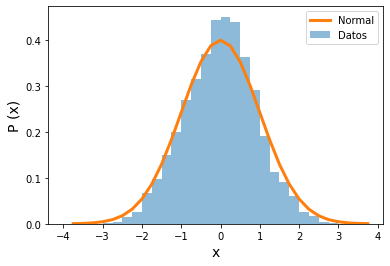

In [78]:
plt.hist(dat, bins, alpha=0.5, density = True, label = 'Datos')
# plt.hist(dat, bins, alpha=0.5, density = False, label = 'Datos')
plt.plot(x, norm.pdf(x), lw = 3, label = 'Normal')
plt.xlabel('x', fontsize = 14)
plt.ylabel('P (x)', fontsize = 14)
plt.legend(loc = 'best')
plt.show()

In [45]:
x = bins[0:-1] + 0.25
y = hist

mu = norm.pdf(x)*ndatos*ancho_bin

In [77]:
mu_min = 50
mu_sel = mu[mu>mu_min]
sigma_sel = np.sqrt(mu_sel)
y_sel = y[mu>mu_min]
z = (y_sel-mu_sel) / sigma_sel

t_obs = np.sum(np.power(z,2))
print("Estadística del test =", t_obs)

grados_libertad = len(y_sel)
p_valor = chi2.sf(t_obs, df=grados_libertad) # Survival function = 1 - cdf
print("p valor =", p_valor)

Estadística del test = 109.76492616670848
p valor = 1.3361037270417573e-15


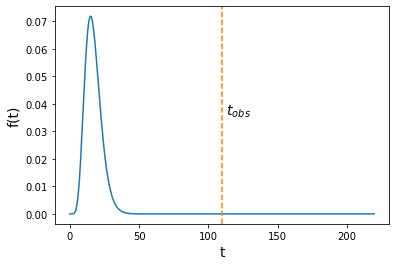

In [75]:
t = np.linspace(0, 2*t_obs, 256)
pdf_chi2 = chi2.pdf(t, df=grados_libertad)

fig, ax = plt.subplots()
ax.plot(t, pdf_chi2)
ax.axvline(t_obs, ls='--', color='tab:orange')
ax.text(t_obs, 0.5, ' $t_{obs}$', transform=ax.get_xaxis_text1_transform(0)[0], fontsize = 14)
ax.set_xlabel('t', fontsize = 14)
ax.set_ylabel('f(t)', fontsize = 14)

plt.show()

In [80]:
sigmas = norm.isf(p_valor) # inverse survival function
print(f'Rechazamos que los datos siguen una distribución estándar normal con un nivel de confianza de {sigmas:.1f} σ')

Rechazamos que los datos siguen una distribución estándar normal con un nivel de confianza de 7.9 σ
